In [297]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.plotly as py
import plotly.graph_objs as go
import plotly
from plotly.offline import init_notebook_mode
import plotly.graph_objs as go
plotly.offline.init_notebook_mode(connected=True)

In [298]:
training_df = pd.read_csv('~/train.csv', error_bad_lines=False)

In [299]:
training_df.shape

(404290, 6)

In [300]:
test_df = pd.read_csv('~/test.csv')

/Users/pranavhonrao/anaconda3/envs/py36/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2785: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.



In [301]:
test_df.shape

(3563475, 3)

In [302]:
training_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404290 entries, 0 to 404289
Data columns (total 6 columns):
id              404290 non-null int64
qid1            404290 non-null int64
qid2            404290 non-null int64
question1       404289 non-null object
question2       404288 non-null object
is_duplicate    404290 non-null int64
dtypes: int64(4), object(2)
memory usage: 18.5+ MB


In [303]:
feature_df =training_df['is_duplicate']

In [304]:
training_df =training_df.drop(columns=['is_duplicate'])

In [305]:
training_error1 =training_df['question1']

In [306]:
training_error2 =training_df['question2']

In [307]:
#training_error1.head()

In [308]:
#training_error2.head()

In [309]:
questions_training_df = training_df[['question1','question2']]

In [310]:
questions_test_df = test_df[['question1','question2']]

In [311]:
temp_check = pd.concat([questions_training_df, questions_test_df])

In [312]:
from nltk.corpus import stopwords
from nltk.stem.porter import *
import nltk
nltk.download("stopwords")
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/pranavhonrao/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/pranavhonrao/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [313]:
sw_dict={}
    
for i in stopwords.words('english'):
    sw_dict[i]=1
    



In [314]:
import re
from nltk.stem import WordNetLemmatizer
#from nltk.stem import PorterStemmer
from stemming.porter2 import stem

lemi_words=[]
stem_words=[]
lmtzr = nltk.WordNetLemmatizer().lemmatize
ps = PorterStemmer()



def do_lemitise(word):
    old_word=word
    word = lmtzr(word)
    if word != old_word:
        lemi_words.append((old_word, word))
        
    return word
    
def do_stem(word):
    old_word=word
    word = stem(word)
    if word != old_word:
        stem_words.append((old_word, word))
    return word
        

def do_process_word(word):
    word = do_stem(word)
    word = do_lemitise(word)
    return word
    
    
    

def corpus_filteration(dfList):
    
    actual_list =[]
    

    
    item_num=0

    for k, v in dfList.iteritems():
        questions_corpus = re.sub('[^a-zA-Z]',' ', str(v)).lower().split()
        '''
        for word in questions_corpus:
            if word not in sw_dict.keys():
                #old_word=word
                word = lmtzr(word)
                #if word != old_word:
                    #lemi_words.append((old_word, word))
                questions_corpus.append(word)
        '''
                
                
                
            
        questions_corpus = [do_process_word(word) for word in questions_corpus if word not in sw_dict.keys()]
        
        actual_list.append(questions_corpus)
        item_num = item_num + 1
        if (item_num%1000000 == 0):
            print ("Done so far {} ".format(item_num) )
    
    return actual_list           
    
    

In [315]:
training_error1.head()

0    What is the step by step guide to invest in sh...
1    What is the story of Kohinoor (Koh-i-Noor) Dia...
2    How can I increase the speed of my internet co...
3    Why am I mentally very lonely? How can I solve...
4    Which one dissolve in water quikly sugar, salt...
Name: question1, dtype: object

In [316]:
training_error1_cf = corpus_filteration(training_error1)

In [317]:
#training_error1_cf[:10]

In [318]:
#lemi_words[:60]

In [319]:
#stem_words[:60]

In [320]:
training_error2_cf = corpus_filteration(training_error2)

In [321]:
temp_check_test_question1 = temp_check['question1']

In [322]:
test_question1_list1 = corpus_filteration(temp_check_test_question1)

Done so far 1000000 
Done so far 2000000 
Done so far 3000000 


In [323]:
temp_check_test_question2 = temp_check['question2']

In [324]:
test_question2_list1 = corpus_filteration(temp_check_test_question2)

Done so far 1000000 
Done so far 2000000 
Done so far 3000000 


In [325]:
#test_check_01 = test_question1_list1[:12]

In [326]:
#test_check_01

In [327]:
#test_check_02= test_question2_list1[:12]

In [328]:
#test_check_02

In [329]:
test_question_list= test_question1_list1 + test_question2_list1

In [330]:
from gensim.models import Word2Vec
model = Word2Vec(test_question_list, min_count=1,size=200)
# summarize the loaded model
print(model)
# summarize vocabulary
words = list(model.wv.vocab)
#print(words)
# access vector for one word
#print(model['hack'])
# save model
model.save('model.bin')
# load model
#new_model = Word2Vec.load('model.bin')
#print(new_model)

Word2Vec(vocab=82404, size=200, alpha=0.025)


In [331]:
print(model['step'])

[ 0.30132636 -0.6309447   0.93614376  1.2811095   0.67750996  0.82636154
 -2.4087334   0.23484921 -2.0655363   0.5655505   0.3841865  -0.14926673
 -2.109347   -0.83460957  0.74853635  0.15402694 -0.46494913  0.5059631
  0.09642255  0.7626299   1.9690708   3.0765297   0.81430185  1.2374572
 -0.25540632  2.4458158   4.793253    0.63186115  2.9247231   2.0464973
  0.4413528  -0.08257546  1.4827652  -1.4334657  -0.61854    -0.4117297
  0.6885372  -1.1330287   0.02036931  0.37144387  0.06664732  1.0636079
 -1.0591456  -0.19945252 -1.2210175  -0.3204671  -0.6283993   0.25376916
 -1.2020339  -1.4125633  -0.9949291  -2.4576762  -0.09945901  1.2800051
 -0.32511282  0.55027866  0.4548484   0.47893262  0.52120656  1.5080441
 -0.26302424 -0.33274108  1.2292767  -2.4053369   1.6666551   2.2257462
 -0.7802061  -0.29559225 -1.8927317   0.3880851   1.1275485   0.94772744
 -0.14966808 -0.16448808 -0.48619002  0.71558684  0.34972322 -0.26545164
  1.0944723  -0.77510387 -0.59367836  2.6564078  -1.2579806

/Users/pranavhonrao/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [332]:

from gensim.models import Word2Vec
from gensim.models import KeyedVectors
#filename = 'GoogleNews-vectors-negative300.bin'
#import pyemd
#word2vec_model = Word2Vec.load(filename)
word2vec_model = KeyedVectors.load('model.bin')
word2vec_model.init_sims(replace=True)


In [333]:
'''
from gensim.scripts.glove2word2vec import glove2word2vec
from gensim.models import KeyedVectors
glove_input_file = 'glove.6B.100d.txt'
word2vec_output_file = 'glove.6B.100d.txt.word2vec'
glove2word2vec(glove_input_file, word2vec_output_file)
filename = 'glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)
model.init_sims(replace=True)
'''
    
   


"\nfrom gensim.scripts.glove2word2vec import glove2word2vec\nfrom gensim.models import KeyedVectors\nglove_input_file = 'glove.6B.100d.txt'\nword2vec_output_file = 'glove.6B.100d.txt.word2vec'\nglove2word2vec(glove_input_file, word2vec_output_file)\nfilename = 'glove.6B.100d.txt.word2vec'\nmodel = KeyedVectors.load_word2vec_format(filename, binary=False)\nmodel.init_sims(replace=True)\n"

In [334]:
'''
filename = 'glove.6B.100d.txt.word2vec'
model = KeyedVectors.load_word2vec_format(filename, binary=False)
model.init_sims(replace=True)
'''


"\nfilename = 'glove.6B.100d.txt.word2vec'\nmodel = KeyedVectors.load_word2vec_format(filename, binary=False)\nmodel.init_sims(replace=True)\n"

In [335]:
from pyemd import emd
def distance_calculation(d1,d2):
        i=j=0
        distance_list=[]
        len_train_01 =len(d1)
        len_train_02 =len(d2)
        item_num=0
        
        
        while (i<len_train_01 and j<len_train_02):
            distance_questions = word2vec_model.wv.wmdistance(d1[i], d2[j])
            #f.write(str(distance_questions))
            distance_list.append(distance_questions)
            i=i+1
            j=j+1
            item_num = item_num + 1
            if (item_num%100000 == 0):
                print ("Done so far {} ".format(item_num) )
        
        training_df['is_duplicate_01']=distance_list
        return training_df
        #return distance_list

In [336]:
distance_calculation(training_error1_cf,training_error2_cf)

Done so far 100000 
Done so far 200000 
Done so far 300000 
Done so far 400000 


,id,qid1,qid2,question1,question2,is_duplicate_01
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0.189051
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0.813153
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0.604027
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,1.342431
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,1.009624
5,5,11,12,Astrology: I am a Capricorn Sun Cap moon and c...,"I'm a triple Capricorn (Sun, Moon and ascendan...",0.648784
6,6,13,14,Should I buy tiago?,What keeps childern active and far from phone ...,1.398554
7,7,15,16,How can I be a good geologist?,What should I do to be a great geologist?,0.475765
8,8,17,18,When do you use シ instead of し?,"When do you use ""&"" instead of ""and""?",0.000000
9,9,19,20,Motorola (company): Can I hack my Charter Moto...,How do I hack Motorola DCX3400 for free internet?,0.644349


In [337]:
 training_df.head()

,id,qid1,qid2,question1,question2,is_duplicate_01
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0.189051
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0.813153
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0.604027
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,1.342431
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,1.009624


In [338]:
#feature_df[:10]

In [339]:

item_num =0
for i, row in training_df['is_duplicate_01'].iteritems():
    if row == 0.000000:
        training_df.set_value(i,'is_duplicate_01',1)
    elif (row >= 0.28 and row <= 0.72):
        training_df.set_value(i,'is_duplicate_01',1)
    else:
        training_df.set_value(i,'is_duplicate_01',0)
    item_num = item_num + 1
    if (item_num%100000 == 0):
        print ("Done so far {} ".format(item_num) )
        
   


/Users/pranavhonrao/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:9: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

/Users/pranavhonrao/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:7: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead

/Users/pranavhonrao/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:5: FutureWarning:

set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead



Done so far 100000 
Done so far 200000 
Done so far 300000 
Done so far 400000 


In [340]:
training_df.head()

,id,qid1,qid2,question1,question2,is_duplicate_01
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0.0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0.0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,1.0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0.0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0.0


In [341]:
#training_df['is_duplicate_01'][:20]
#training_df['is_duplicate_01']=training_df[int(training_df['is_duplicate_01'])]
training_df['is_duplicate_01'] = training_df['is_duplicate_01'].astype(int)

In [342]:
training_df.head()

,id,qid1,qid2,question1,question2,is_duplicate_01
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,1
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0
4,4,9,10,"Which one dissolve in water quikly sugar, salt...",Which fish would survive in salt water?,0


In [343]:
len(training_df)

404290

In [344]:
from sklearn.metrics import confusion_matrix,accuracy_score

y_actu = feature_df
y_pred = training_df['is_duplicate_01']
#cf_ma = confusion_matrix(y_actu, y_pred)
a_score=accuracy_score(y_actu, y_pred)

In [345]:
cf_ma = confusion_matrix(y_actu, y_pred)
cf_ma

array([[153497, 101530],
       [ 38694, 110569]])

In [346]:
#cf_ma
a_score

0.6531598604961785

In [347]:
#accuracy_score =67.30 when dimension=100
#chaging to 300 now

In [348]:
def avg_length_corpus(training_error1_cf):
    
    min_length=0
    max_length=len(training_error1_cf[0])
    
    for i in range(0,len(training_error1_cf)):
        if len(training_error1_cf[i]) <=min_length :
            min_length= len(training_error1_cf[i])
        
    
    for i in range(1,len(training_error1_cf)):
        if len(training_error1_cf[i]) > max_length:
            max_length= len(training_error1_cf[i])
        
    
    avg_length= (min_length + max_length)//2
    
    
    return min_length,max_length,avg_length



In [349]:
avg_question1_training_set= avg_length_corpus(training_error1_cf)

In [350]:
avg_question2_training_set= avg_length_corpus(training_error2_cf)

In [351]:
print(avg_question1_training_set)
print(avg_question2_training_set)

(0, 53, 26)
(0, 97, 48)


In [352]:
def len_trainging_questions_array(training_error1_cf):
    questions_length_array =[]
    for i in training_error1_cf:
        questions_length_array.append(len(i))
        
    return questions_length_array
    

In [353]:
question_1_length =len_trainging_questions_array(training_error1_cf)

In [354]:
question_2_length =len_trainging_questions_array(training_error2_cf)

In [355]:

import plotly.plotly as py
import plotly.graph_objs as go


trace = go.Box(
    y= question_2_length,
    name='Mean & SD',
    marker=dict(
        color='rgb(10, 140, 208)',
    ),
    boxmean='sd'
)
data = [trace]
#py.iplot(data)
plotly.offline.plot(data)


'file:///Users/pranavhonrao/anaconda3/temp-plot.html'

In [356]:
def duplicate_entries(input_array):
    
    final_result=[]
    new_array=[]
    unseen=set()
    count=0
    for i in input_array:
        for j in i:
                 if j not in unseen:
                    unseen.add(j)
                    final_result.append(model[j])
                    #final_result.append(j)
        if len(final_result) >5:
            final_result=final_result[0:5]
        else:
            array_length=len(final_result)
            while array_length <5:
                final_result.append(np.zeros(200))
                array_length=array_length +1
                    
        new_array.append(final_result)
        final_result=[]
            
    
    return new_array
    
            



In [357]:
vector_training_set_question1 =duplicate_entries(training_error1_cf)

/Users/pranavhonrao/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [358]:
print(type(vector_training_set_question1))

<class 'list'>


In [359]:
vector_training_set_question2 =duplicate_entries(training_error2_cf)


            
        

/Users/pranavhonrao/anaconda3/envs/py36/lib/python3.6/site-packages/ipykernel_launcher.py:11: DeprecationWarning:

Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).



In [360]:
#vector_training_set_question2

In [361]:
a = np.array(vector_training_set_question1)
b = np.array(vector_training_set_question2)





In [362]:
result=np.column_stack((a,b))

In [363]:
len(result)

404290

In [364]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from keras.regularizers import L1L2
from keras.utils import np_utils

In [378]:
in_dim = 2000

In [366]:
y=feature_df

In [367]:
X=result

In [368]:
from sklearn.model_selection import train_test_split
#X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.20, random_state=42)

In [369]:
model = Sequential()
model.add(Dense(2, activation='relu'))
model.add(Dense(2, activation='softmax',input_dim=2000) )
#model.add(Dense(2,Activation('softmax')))


In [370]:
#model.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])

In [371]:
model

In [372]:
model.compile(optimizer='sgd',loss='binary_crossentropy',metrics=['accuracy'])

In [373]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [374]:
len(X_test)

121287

In [379]:
X_train= X_train.reshape(283003, in_dim)

In [380]:
X_train = X_train.astype('float32')

In [381]:
X_test = X_test.reshape(121287, in_dim) 

In [382]:
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [383]:
nb_classes =2

In [384]:
Y_train = np_utils.to_categorical(y_train)
Y_test = np_utils.to_categorical(y_test)

In [385]:
history = model.fit(X_train, Y_train, validation_split=0.33,epochs=150,batch_size=64)

Train on 189612 samples, validate on 93391 samples
Epoch 1/150
189612/189612 [==============================] - 7s 37us/step - loss: 0.6714 - acc: 0.6319 - val_loss: 0.6589 - val_acc: 0.6302
Epoch 2/150
189612/189612 [==============================] - 6s 31us/step - loss: 0.6579 - acc: 0.6319 - val_loss: 0.6589 - val_acc: 0.6302 4s - l - ETA: 0s - loss: 
Epoch 3/150
189612/189612 [==============================] - 6s 29us/step - loss: 0.6579 - acc: 0.6319 - val_loss: 0.6589 - val_acc: 0.6302- acc: 0
Epoch 4/150
189612/189612 [==============================] - 6s 29us/step - loss: 0.6579 - acc: 0.6319 - val_loss: 0.6589 - val_acc: 0.6302
Epoch 5/150
189612/189612 [==============================] - 6s 29us/step - loss: 0.6579 - acc: 0.6319 - val_loss: 0.6588 - val_acc: 0.6302
Epoch 6/150
189612/189612 [==============================] - 5s 27us/step - loss: 0.6579 - acc: 0.6319 - val_loss: 0.6589 - val_acc: 0.6302
Epoch 7/150
189612/189612 [==============================] - 5s 28us/step -

189612/189612 [==============================] - 4s 23us/step - loss: 0.6579 - acc: 0.6319 - val_loss: 0.6589 - val_acc: 0.6302
Epoch 58/150
189612/189612 [==============================] - 4s 23us/step - loss: 0.6579 - acc: 0.6319 - val_loss: 0.6589 - val_acc: 0.6302
Epoch 59/150
189612/189612 [==============================] - 5s 24us/step - loss: 0.6579 - acc: 0.6319 - val_loss: 0.6589 - val_acc: 0.6302
Epoch 60/150
189612/189612 [==============================] - 5s 28us/step - loss: 0.6579 - acc: 0.6319 - val_loss: 0.6589 - val_acc: 0.6302
Epoch 61/150
189612/189612 [==============================] - 5s 25us/step - loss: 0.6579 - acc: 0.6319 - val_loss: 0.6589 - val_acc: 0.6302
Epoch 62/150
189612/189612 [==============================] - 5s 25us/step - loss: 0.6579 - acc: 0.6319 - val_loss: 0.6589 - val_acc: 0.6302
Epoch 63/150
189612/189612 [==============================] - 4s 23us/step - loss: 0.6579 - acc: 0.6319 - val_loss: 0.6589 - val_acc: 0.6302
Epoch 64/150
189612/189612

189612/189612 [==============================] - 4s 22us/step - loss: 0.6579 - acc: 0.6319 - val_loss: 0.6589 - val_acc: 0.6302
Epoch 115/150
189612/189612 [==============================] - 4s 22us/step - loss: 0.6579 - acc: 0.6319 - val_loss: 0.6589 - val_acc: 0.6302
Epoch 116/150
189612/189612 [==============================] - 4s 22us/step - loss: 0.6579 - acc: 0.6319 - val_loss: 0.6588 - val_acc: 0.6302
Epoch 117/150
189612/189612 [==============================] - 4s 22us/step - loss: 0.6579 - acc: 0.6319 - val_loss: 0.6589 - val_acc: 0.6302
Epoch 118/150
189612/189612 [==============================] - 4s 23us/step - loss: 0.6579 - acc: 0.6319 - val_loss: 0.6589 - val_acc: 0.6302
Epoch 119/150
189612/189612 [==============================] - 4s 22us/step - loss: 0.6579 - acc: 0.6319 - val_loss: 0.6589 - val_acc: 0.6302
Epoch 120/150
189612/189612 [==============================] - 4s 22us/step - loss: 0.6579 - acc: 0.6319 - val_loss: 0.6589 - val_acc: 0.6302
Epoch 121/150
189612

In [386]:
score = model.evaluate(X_test, Y_test,verbose=0)



In [ ]:
score

In [387]:


print('Test score:', score[0])
print('Test accuracy:', score[1])

Test score: 0.6592240573097162
Test accuracy: 0.6294986272245072


In [ ]:
print(history.history.keys())

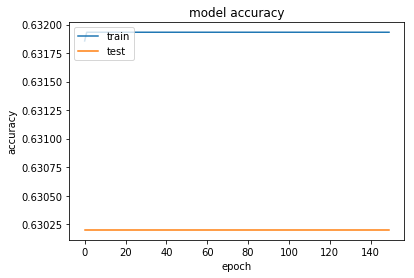

In [388]:

# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

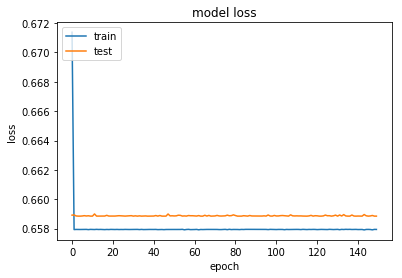

In [389]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [390]:
predictions = model.predict(X_test)
print('First prediction:', predictions)

First prediction: [[0.63048565 0.3695143 ]
 [0.63048565 0.3695143 ]
 [0.63048565 0.3695143 ]
 ...
 [0.63048565 0.3695143 ]
 [0.63048565 0.3695143 ]
 [0.63048565 0.3695143 ]]
